In [ ]:
# #colab에서 한글이 깨질때 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,560 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

# EDA 목표
*   유니콘 기업 분류 및 예비 유니콘 기업 분류
*   데이터 관계를 통해 가설 설립





In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
company_df = pd.read_csv('/content/MyDrive/MyDrive/company_nps_data.csv', encoding="cp949")

In [4]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [5]:
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [6]:
company_df['년도'].sort_values()

50120    2015
61242    2015
61226    2015
39082    2015
90227    2015
         ... 
75986    2019
17795    2019
78226    2019
20316    2019
7408     2019
Name: 년도, Length: 99801, dtype: int64

In [7]:
print(company_df.shape) # 데이터의 행, 열 개수 출력
print(company_df.dtypes) # 데이터의 타입 출력

(99801, 6)
회사ID        int64
연매출액        int64
년도          int64
월           int64
월별_연금보험료    int64
월별_직원수      int64
dtype: object


In [8]:
company_df[company_df.duplicated(keep=False)] # 중복된 열 출력 --> 없음

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수


In [9]:
company_df.isna().sum() # 컬럼별 NaN값 출력 --> NaN값 없음

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [10]:
company_df.describe() # 컬럼별 요약 통계 지표 출력

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [11]:
company_df.corr() # 회사 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,1.000000,-0.001675,-0.033194,0.008969,-0.010393,0.007430
연매출액,-0.001675,1.000000,0.015202,-0.001347,0.729694,0.638125
년도,-0.033194,0.015202,1.000000,-0.096107,0.008121,-0.002206
월,0.008969,-0.001347,-0.096107,1.000000,0.005006,0.002000
월별_연금보험료,-0.010393,0.729694,0.008121,0.005006,1.000000,0.962101
월별_직원수,0.007430,0.638125,-0.002206,0.002000,0.962101,1.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


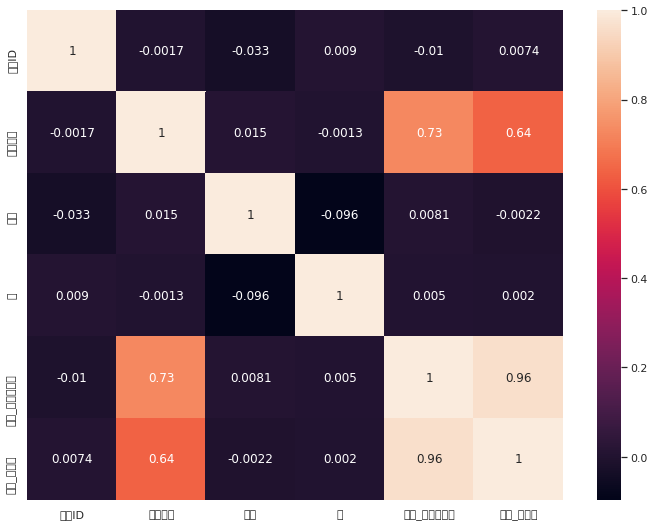

In [12]:
sns.heatmap(company_df.corr(), annot=True)
# 연매출액과 연금보험료, 월별 직원수 상관관계임

#개인적인 전처리 방향


1. 연매출액이 1조 이상 유니콘기업과 1000억이상 예비유니콘분류
2. 3년 평균 20%이상 성장율인 기업 분류
3. 직원수 기준을 통해 분류

#팀 전처리 회의 결과

1.   직원수 0 제외
2.   연매출액 1000억 이상(1000억이상이면 마이너스가 안될꺼 같음)
3.   3년이상 기업
4.   보험료, 직원수, 연매출 증가율 칼럼 추가









In [13]:
company_df['년월'] = pd.to_datetime(company_df['년도'].astype(str) + company_df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

In [14]:
company_df = company_df.drop(index=company_df.query('월별_직원수 == 0').index) # 직원수 0명 제외
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,201702
99797,239388,1045021,2018,10,1428800,9,201810
99798,272304,181898,2018,3,392560,4,201803
99799,362194,2100218,2018,12,874780,3,201812


In [15]:
company_df = company_df.groupby('회사ID').filter(lambda x: len(x)>=36) # 3년이상 된 기업
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
7,189562,7119908,2016,1,1276900,6,201601
...,...,...,...,...,...,...,...
99791,442613,1513092,2017,3,3457380,20,201703
99793,199954,1651504,2016,1,1414960,6,201601
99795,150135,7119441,2016,12,4872520,25,201612
99796,171439,4630622,2017,2,2402740,11,201702


In [16]:
company_df['회사ID'].value_counts()

134575    50
250472    50
14271     50
128174    50
442467    50
          ..
187137    36
307820    36
469567    36
332709    36
210711    36
Name: 회사ID, Length: 1127, dtype: int64

In [17]:
company_df.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
년월          0
dtype: int64

In [ ]:
# company_df = company_df[company_df['연매출액']>24900000] # 249억이상 기준
# company_df

In [18]:
company_df = company_df[company_df['연매출액']>100000000] # 1000억이상 기업 기준
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
55,231080,152393780,2018,7,51609300,160,201807
65,231080,132542490,2017,8,42458520,144,201708
127,130322,201421946,2018,7,31335400,107,201807
135,232757,294131018,2018,2,7610780,40,201802
162,127060,287298836,2018,4,127501260,396,201804
...,...,...,...,...,...,...,...
99635,126538,671580655,2016,10,380370640,1214,201610
99724,294387,150451803,2017,9,161888520,768,201709
99757,128174,106106973,2017,2,51496520,192,201702
99760,420046,488179570,2017,7,121248540,398,201707


In [19]:
a_df = company_df['회사ID'].unique() # 1000억 기준 76개의 회사 검출 / 249억 기준 289개 회사 검출
print(company_df['회사ID'].value_counts())
a_df.sort()
a_df

419945    48
403359    38
294387    38
126983    38
403462    38
          ..
128485    12
420165    12
231606    12
403470    12
296476     2
Name: 회사ID, Length: 76, dtype: int64


array([126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814,
       126831, 126983, 127060, 127065, 127090, 127180, 127202, 127366,
       127511, 127669, 128174, 128440, 128485, 128539, 128638, 128896,
       129828, 130322, 130386, 130387, 130577, 130729, 133951, 146654,
       154500, 227414, 227415, 231080, 231173, 231384, 231606, 231703,
       232757, 234236, 294337, 294367, 294387, 294530, 294620, 294649,
       294790, 295618, 296476, 297327, 297874, 301484, 381180, 381344,
       382850, 403351, 403359, 403434, 403462, 403470, 403504, 419945,
       419977, 419998, 420008, 420046, 420076, 420082, 420165, 426429,
       428817, 430504, 469677, 510329])

In [20]:
com = company_df.sort_values(by=['회사ID','년도','월','년월'], axis=0)
com['연매출액_증가율(%)'] = round(com[['회사ID', '연매출액']].groupby('회사ID').pct_change(), 4) *100
com['직원수_증가율(%)'] = round(com[['회사ID', '월별_직원수']].groupby('회사ID').pct_change(), 4) *100
com['보험료_증가율(%)'] = round(com[['회사ID', '월별_연금보험료']].groupby('회사ID').pct_change(), 4) *100

In [21]:
com

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%)
95996,126521,567910907,2015,11,525409000,1588,201511,NaN,NaN,NaN
28780,126521,567910907,2015,12,503888480,1520,201512,0.00,-4.28,-4.10
91940,126521,560278128,2016,1,514146080,1559,201601,-1.34,2.57,2.04
79111,126521,560278128,2016,2,520103520,1583,201602,0.00,1.54,1.16
38276,126521,560278128,2016,3,519897880,1581,201603,0.00,-0.13,-0.04
...,...,...,...,...,...,...,...,...,...,...
78403,510329,143513683,2018,8,137202420,609,201808,0.00,5.73,3.88
54886,510329,143513683,2018,9,137436680,609,201809,0.00,0.00,0.17
83728,510329,143513683,2018,10,138112640,614,201810,0.00,0.82,0.49
24055,510329,143513683,2018,11,136699180,606,201811,0.00,-1.30,-1.02


In [22]:
com.isna().sum()

회사ID            0
연매출액            0
년도              0
월               0
월별_연금보험료        0
월별_직원수          0
년월              0
연매출액_증가율(%)    76
직원수_증가율(%)     76
보험료_증가율(%)     76
dtype: int64

In [23]:
com = com[['회사ID', '년월', '연매출액', '월별_연금보험료', '월별_직원수', '연매출액_증가율(%)', '직원수_증가율(%)','보험료_증가율(%)','년도','월']]
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,NaN,NaN,NaN,2015,11
28780,126521,201512,567910907,503888480,1520,0.00,-4.28,-4.10,2015,12
91940,126521,201601,560278128,514146080,1559,-1.34,2.57,2.04,2016,1
79111,126521,201602,560278128,520103520,1583,0.00,1.54,1.16,2016,2
38276,126521,201603,560278128,519897880,1581,0.00,-0.13,-0.04,2016,3
...,...,...,...,...,...,...,...,...,...,...
78403,510329,201808,143513683,137202420,609,0.00,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.00,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.00,0.82,0.49,2018,10
24055,510329,201811,143513683,136699180,606,0.00,-1.30,-1.02,2018,11


In [25]:
com = com.fillna(0) 
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,0.00,0.00,0.00,2015,11
28780,126521,201512,567910907,503888480,1520,0.00,-4.28,-4.10,2015,12
91940,126521,201601,560278128,514146080,1559,-1.34,2.57,2.04,2016,1
79111,126521,201602,560278128,520103520,1583,0.00,1.54,1.16,2016,2
38276,126521,201603,560278128,519897880,1581,0.00,-0.13,-0.04,2016,3
...,...,...,...,...,...,...,...,...,...,...
78403,510329,201808,143513683,137202420,609,0.00,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.00,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.00,0.82,0.49,2018,10
24055,510329,201811,143513683,136699180,606,0.00,-1.30,-1.02,2018,11


In [26]:
com.isna().sum()

회사ID           0
년월             0
연매출액           0
월별_연금보험료       0
월별_직원수         0
연매출액_증가율(%)    0
직원수_증가율(%)     0
보험료_증가율(%)     0
년도             0
월              0
dtype: int64

In [27]:
median_com = com.groupby('회사ID')['월별_직원수'].median()
median_com

회사ID
126521    1508.5
126538    1263.5
126606     969.5
126664     811.5
126674     790.5
           ...  
426429     168.5
428817      11.0
430504       6.0
469677     547.0
510329     591.5
Name: 월별_직원수, Length: 76, dtype: float64

In [28]:
print(median_com.max())
print(median_com.min())
print(median_com.mean()) 

2696.0
6.0
452.5328947368421


In [29]:
com = com[com['월별_직원수']>452] # 1000억 기준 직원수 중앙값이 452이므로 인원 기준 452명으로 설정
com

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,0.00,0.00,0.00,2015,11
28780,126521,201512,567910907,503888480,1520,0.00,-4.28,-4.10,2015,12
91940,126521,201601,560278128,514146080,1559,-1.34,2.57,2.04,2016,1
79111,126521,201602,560278128,520103520,1583,0.00,1.54,1.16,2016,2
38276,126521,201603,560278128,519897880,1581,0.00,-0.13,-0.04,2016,3
...,...,...,...,...,...,...,...,...,...,...
78403,510329,201808,143513683,137202420,609,0.00,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.00,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.00,0.82,0.49,2018,10
24055,510329,201811,143513683,136699180,606,0.00,-1.30,-1.02,2018,11


In [30]:
# com = com[com['월별_직원수']>178] # 249억 기준 직원수 중앙값이 178이므로 인원 기준 178명으로 설정
# com

In [31]:
df = com[com['연매출액_증가율(%)']>= 0]
df

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,0.0,0.00,0.00,2015,11
28780,126521,201512,567910907,503888480,1520,0.0,-4.28,-4.10,2015,12
79111,126521,201602,560278128,520103520,1583,0.0,1.54,1.16,2016,2
38276,126521,201603,560278128,519897880,1581,0.0,-0.13,-0.04,2016,3
28690,126521,201604,560278128,519107020,1579,0.0,-0.13,-0.15,2016,4
...,...,...,...,...,...,...,...,...,...,...
78403,510329,201808,143513683,137202420,609,0.0,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.0,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.0,0.82,0.49,2018,10
24055,510329,201811,143513683,136699180,606,0.0,-1.30,-1.02,2018,11


In [32]:
df = df[df['직원수_증가율(%)']>= 0]
df

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,0.0,0.00,0.00,2015,11
79111,126521,201602,560278128,520103520,1583,0.0,1.54,1.16,2016,2
23081,126521,201607,560278128,546483440,1601,0.0,2.50,6.41,2016,7
98081,126521,201608,560278128,554419660,1621,0.0,1.25,1.45,2016,8
46829,126521,201609,560278128,553800420,1622,0.0,0.06,-0.11,2016,9
...,...,...,...,...,...,...,...,...,...,...
2421,510329,201807,143513683,132073100,576,0.0,0.88,0.86,2018,7
78403,510329,201808,143513683,137202420,609,0.0,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.0,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.0,0.82,0.49,2018,10


In [33]:
df = df[df['보험료_증가율(%)']>= 0]
df

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
95996,126521,201511,567910907,525409000,1588,0.0,0.00,0.00,2015,11
79111,126521,201602,560278128,520103520,1583,0.0,1.54,1.16,2016,2
23081,126521,201607,560278128,546483440,1601,0.0,2.50,6.41,2016,7
98081,126521,201608,560278128,554419660,1621,0.0,1.25,1.45,2016,8
48036,126521,201710,554767229,527251000,1452,0.0,0.35,0.24,2017,10
...,...,...,...,...,...,...,...,...,...,...
2421,510329,201807,143513683,132073100,576,0.0,0.88,0.86,2018,7
78403,510329,201808,143513683,137202420,609,0.0,5.73,3.88,2018,8
54886,510329,201809,143513683,137436680,609,0.0,0.00,0.17,2018,9
83728,510329,201810,143513683,138112640,614,0.0,0.82,0.49,2018,10


In [34]:
com_list= df['회사ID'].unique()
com_list

array([126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814,
       126831, 126983, 227414, 227415, 294337, 294367, 294387, 403351,
       403359, 403434, 419945, 419977, 419998, 420008, 469677, 510329])

In [35]:
company_list = [] # 20프로 이상 성장 기업 1000억 기준: 17개 249억 기준:17개
for x in com_list:
  com_df = df[df['회사ID']==x]
  if sum(com_df['연매출액_증가율(%)']) > 20:
    company_list.append(x)
print(len(company_list))
company_list

5


[126664, 126983, 294337, 294367, 294387]

In [36]:
list_company = [] #직원수_증가율이 마이너스가 아닌 기업 17개 249억 기준: 17개
for x in company_list:
  comdf = df[df['회사ID']==x]
  if sum(comdf['직원수_증가율(%)']) > 0:
    list_company.append(x)

print(len(list_company))
print(list_company)


5
[126664, 126983, 294337, 294367, 294387]


In [37]:
list_com = [] #직원수_증가율이 마이너스가 아닌 기업 17개 249억 기준: 17개
for x in list_company:
  comp = df[df['회사ID']==x]
  if sum(comp['보험료_증가율(%)']) > 0:
    list_com.append(x)

print(len(list_com))
print(list_com)


5
[126664, 126983, 294337, 294367, 294387]


# 기업도출

*   데이터 전처리 조건

1.   매출 1000억 이상 / 249억 이상
2.   성장이 마이너스율이 아닌 기업
3.   직원수 증가율 0 이상
4.   성장율이 20프로 이상
5.   보험료 증가율 0 이상
6.   1000억 / 249억 직원수 중앙값 기준











---
# 예상 유니콘 기업 (1000억 기준)



*  126664, 126983, 294337, 294367, 294387



---
# 예상 유니콘 기업 (249억 기준)



*   126664, 126802, 126983, 127090, 127366, 127503, 127511,
  
  294337, 294367, 294387, 294530, 403462, 420046, 420165,
  
  440094, 469677, 470125







In [38]:
def graph(x):
  temp = com[com['회사ID']==x]
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  plt.title(f'{x}: 매출액')
  plt.plot(temp['년도'],temp['연매출액_증가율(%)'])

  plt.figure(figsize=(20,10))
  plt.subplot(2,2,2)
  plt.title(f'{x}: 직원수')
  plt.plot(temp['년월'],temp['직원수_증가율(%)'])
  plt.xticks(rotation=70)

  plt.figure(figsize=(20,10))
  plt.subplot(2,2,3)
  plt.title(f'{x}: 보험료')
  plt.plot(temp['년월'],temp['보험료_증가율(%)'])
  plt.xticks(rotation=70)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text

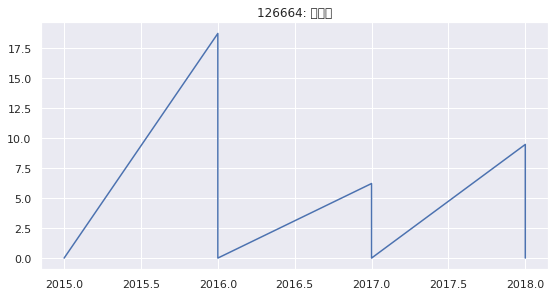

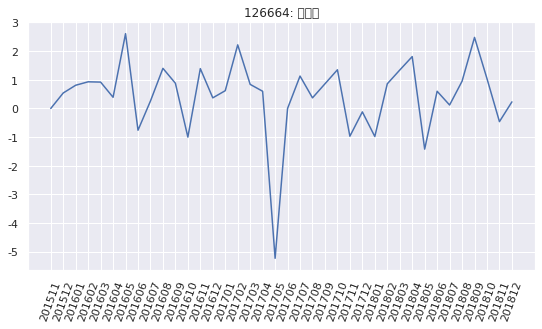

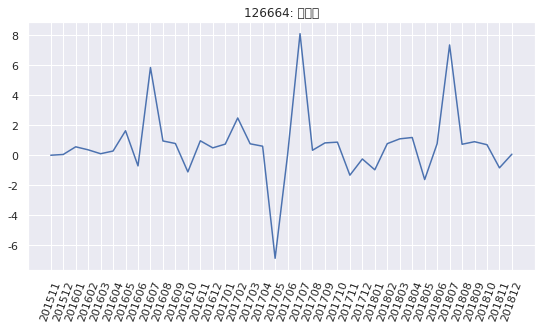

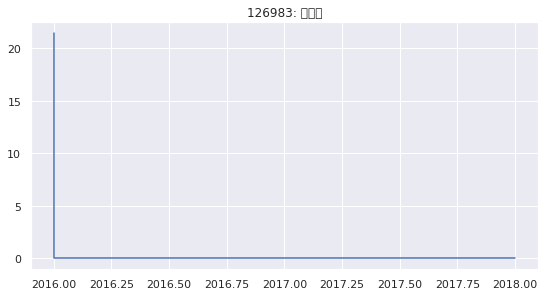

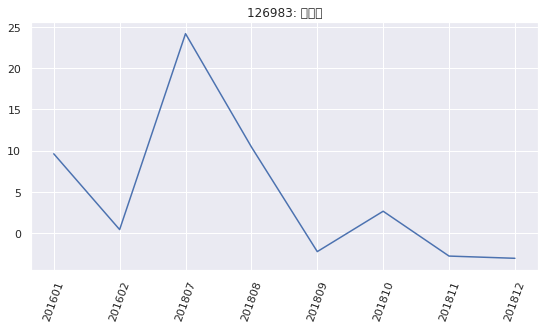

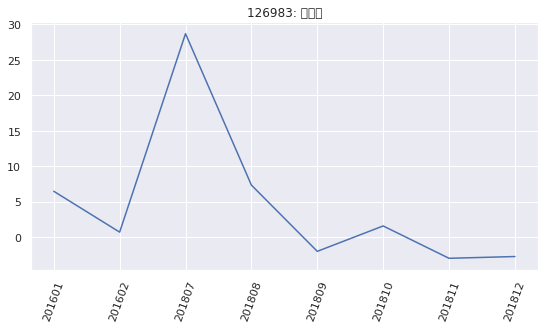

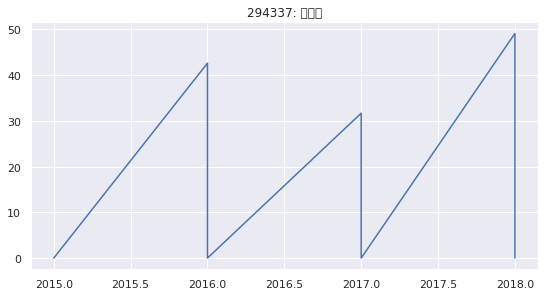

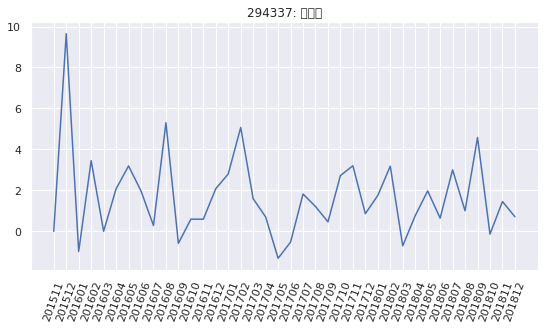

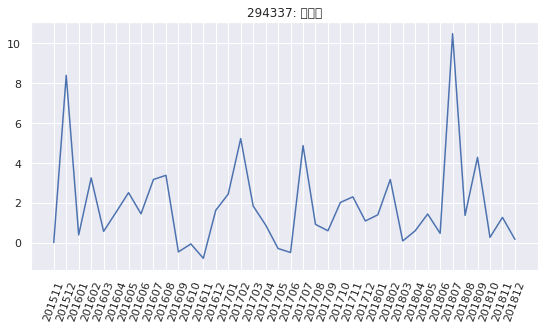

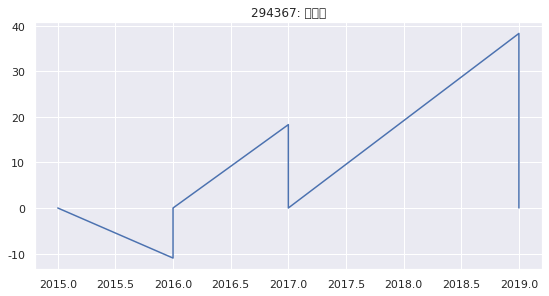

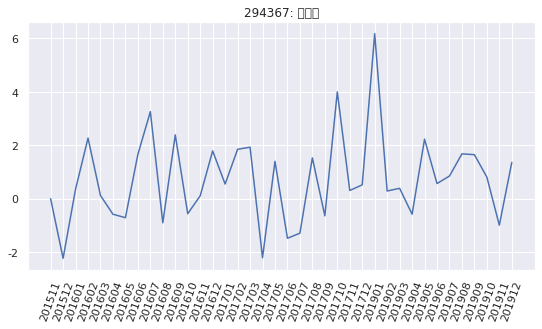

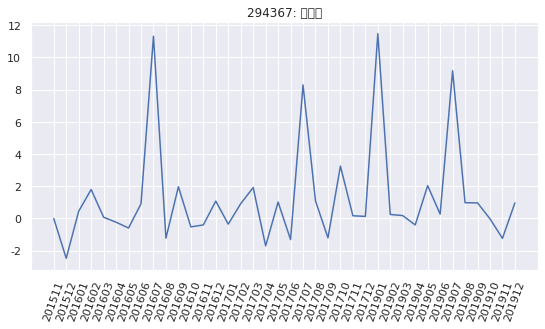

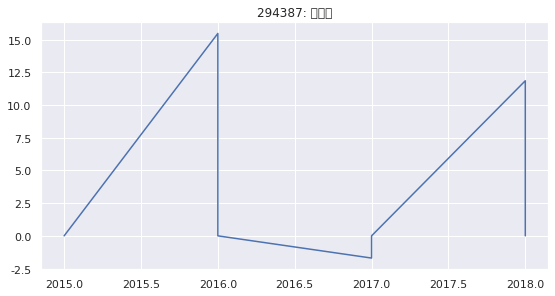

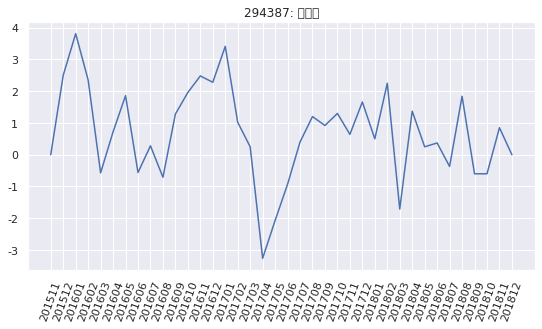

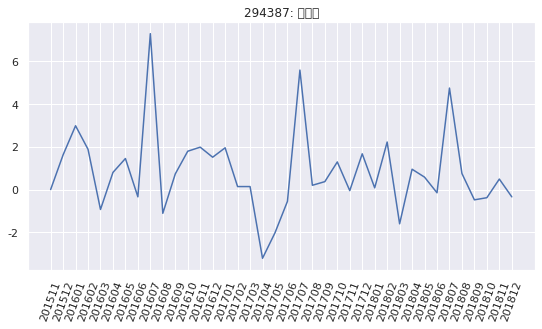

In [39]:
for x in list_company:
  graph(x)

In [40]:
df_126664 = com[com['회사ID']==126664]
df_126664

,회사ID,년월,연매출액,월별_연금보험료,월별_직원수,연매출액_증가율(%),직원수_증가율(%),보험료_증가율(%),년도,월
3937,126664,201511,256505233,225166820,740,0.00,0.00,0.00,2015,11
29132,126664,201512,256505233,225269940,744,0.00,0.54,0.05,2015,12
67267,126664,201601,304408150,226535440,750,18.68,0.81,0.56,2016,1
74227,126664,201602,304408150,227341300,757,0.00,0.93,0.36,2016,2
22886,126664,201603,304408150,227574920,764,0.00,0.92,0.10,2016,3
90610,126664,201604,304408150,228204560,767,0.00,0.39,0.28,2016,4
82045,126664,201605,304408150,231921380,787,0.00,2.61,1.63,2016,5
54230,126664,201606,304408150,230265700,781,0.00,-0.76,-0.71,2016,6
91355,126664,201607,304408150,243721920,783,0.00,0.26,5.84,2016,7
74988,126664,201608,304408150,246041600,794,0.00,1.40,0.95,2016,8


# 그래프 결과 (1000억 기준)

126664 애매 - 전체 평균 성장율 11프로 정도

126983 조건에 적합 

294337 조건에 적합

294367 조건에 적합

294387 애매 - 16/12월 17/1월 성장율이 마이너스 그 외 2년은 성장 


---
# 분석한 결과의 개인 견해
현재 그래프를 분석한 결과 매출액과 직원수와 밀접한 연관은 없는 듯 함

아래 회사ID 유니콘 기업 또는 예비 유니콘기업이라고 판단 함

126983 / 294337 / 294367 



# 그래프 결과 (249억 기준)

126664 애매 - 전체 평균 성장율 11프로 정도

126802 애매 - 2년은 급성장하지만 18년 1월 매출액이 급하락

126983 조건에 적합

127090 애매 - 2년은 급성장하지만 18년 1월 매출액이 급하락

127366 조건에 적합

127503 애매 - 2년치 데이터만 있어가지고 판단하기 어려움 

127511 우하향으로 선정에서 빼야함

294337 조건에 적합

294367 조건에 적합
 
294387 애매 - 16/12월 17/1월 성장율이 마이너스 그 외 2년은 성장

294530 조건에 적합

403462 애매 - 17/12 18/1월 유지

420046 조건에 적합

420165 애매 - 그래프는 우상향인데 데이터가 부족한 것 같음

440094 조건에 적합

469677 조건에 적합

470125 애매 - 그래프는 우상향인데 데이터가 부족한 것 같음

---
# 분석한 결과의 개인 견해
현재 그래프를 분석한 결과 매출액과 직원수와 밀접한 연관은 없는 듯 함

아래 회사ID가 유니콘 기업 또는 예비 유니콘기업이라고 판단 함 8개

126983 / 127366 /294530 / 294337 / 294367 / 420046 / 440094 / 469677
